In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import psycopg2
import getpass
import pandas.io.sql as psql

password = getpass.getpass("Please provide your password: ")
conn = psycopg2.connect(
    host="pg.analytics.northwestern.edu",
    database="everything2023",
    user="bvt1891", # change here!
    password=password)
print("Connected.")
cur = conn.cursor()

Please provide your password: ········
Connected.


In [3]:
query = """SELECT count(*) from group_4.trnsact"""
print(psql.read_sql(query, conn))

/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_51421/251906476.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  print(psql.read_sql(query, conn))


       count
0  120916896


In [4]:
query = """SELECT * from group_4.trnsact order by random() LIMIT 1000000"""
trnsact_df = psql.read_sql(query,conn)
trnsact_df.head()

/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_51421/3929071350.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  trnsact_df = psql.read_sql(query,conn)


,sku,store,register,trannum,interid,saledate,stype,quantity,orgprice,amt,seq,mic
0,1217607,1002,160,1600,0,2005-07-23,P,1,56.0,42.0,328800053,45
1,7437469,4104,410,2400,0,2004-12-23,P,1,40.0,40.0,42500207,562
2,9242227,4409,750,2800,0,2004-11-09,P,1,6.0,3.0,436000013,400
3,8377230,3003,120,2400,0,2004-11-27,P,1,16.0,16.0,935700120,457
4,5758109,4802,540,3700,0,2005-07-05,P,1,18.5,18.5,297800043,281


In [5]:
trnsact_df.saledate.max()

datetime.date(2005, 8, 27)

In [6]:
trnsact_df.saledate.max()

datetime.date(2005, 8, 27)

In [7]:
strinfo_df = psql.read_sql("select * from group_4.strinfo", conn)
strinfo_df.head()

/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_51421/2721569316.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  strinfo_df = psql.read_sql("select * from group_4.strinfo", conn)


,store,city,state,zip
0,2,ST. PETERSBURG,FL,33710
1,3,ST. LOUIS,MO,63126
2,4,LITTLE ROCK,AR,72201
3,7,FORT WORTH,TX,76137
4,9,TEMPE,AZ,85281


In [8]:
trnsact_store_df = pd.merge(trnsact_df, strinfo_df, on='store', how='left')

### Top Selling States

In [9]:
trnsact_store_df.groupby('state')['amt'].sum().sort_values(ascending=False).head(10)

state
TX    5564009.12
FL    3435391.28
LA    1420495.11
OH    1324056.37
AZ    1255785.47
TN     952154.98
OK     881879.30
MO     877461.90
AR     840495.58
AL     779322.11
Name: amt, dtype: float64

With 100 million+ rows, loading the entire dataset is impractical due to its size. Instead, we'll focus on Texas transactions and limit the analysis to a specific one-year period, analyzing the state with the highest sales within a randomly selected subset of 10 million entries. Also, analyzing sales within the same location aids future predictions.

In [10]:
query = """ SELECT t.*
            FROM group_4.trnsact t
            LEFT JOIN group_4.strinfo s ON t.store = s.store
            WHERE s.state = 'TX' """
trnsact_df = psql.read_sql(query,conn)
trnsact_df.head()

/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_51421/19278194.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  trnsact_df = psql.read_sql(query,conn)


,sku,store,register,trannum,interid,saledate,stype,quantity,orgprice,amt,seq,mic
0,5148332,1007,190,4400,532904186,2005-07-07,P,1,50.0,33.5,691000054,557
1,5148332,1007,260,4000,0,2005-05-24,P,1,50.0,50.0,252300048,557
2,5148332,1007,390,2200,0,2005-04-09,P,1,50.0,50.0,451300098,557
3,5148332,1007,390,2200,290609039,2005-05-29,P,1,50.0,50.0,69800047,557
4,5148332,1007,390,2400,0,2005-06-12,R,1,50.0,50.0,18700042,557


In [11]:
sku_df = psql.read_sql("select * from group_4.skuinfo", conn)

/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_51421/2049765761.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sku_df = psql.read_sql("select * from group_4.skuinfo", conn)


In [12]:
trnsact_sku_df = pd.merge(trnsact_df, sku_df, on='sku', how='left')

In [13]:
skst_df = psql.read_sql("select * from group_4.skstinfo", conn)

/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_51421/2620855017.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  skst_df = psql.read_sql("select * from group_4.skstinfo", conn)


In [14]:
dept_df = psql.read_sql("select * from group_4.deptinfo", conn)

/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_51421/2636067228.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dept_df = psql.read_sql("select * from group_4.deptinfo", conn)


In [15]:
# Close the cursor
cur.close()
# Close the database connection
conn.close()

In [16]:
tx_transation_df = pd.merge(trnsact_sku_df, skst_df, on = ['sku','store'], how='left')
tx_transation_df

,sku,store,register,trannum,interid,saledate,stype,quantity,orgprice,amt,...,classid,upc,style,color,size,packsize,vendor,brand,cost,retail
0,5148332,1007,190,4400,532904186,2005-07-07,P,1,50.0,33.5,...,815,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5
1,5148332,1007,260,4000,0,2005-05-24,P,1,50.0,50.0,...,815,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5
2,5148332,1007,390,2200,0,2005-04-09,P,1,50.0,50.0,...,815,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5
3,5148332,1007,390,2200,290609039,2005-05-29,P,1,50.0,50.0,...,815,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5
4,5148332,1007,390,2400,0,2005-06-12,R,1,50.0,50.0,...,815,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26917527,5148332,907,400,300,850107029,2005-06-28,P,1,50.0,50.0,...,815,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,12.0,25.0
26917528,5148332,907,400,1500,915307232,2005-07-03,P,1,50.0,33.5,...,815,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,12.0,25.0
26917529,5148332,907,400,6400,248704549,2005-07-01,P,1,50.0,33.5,...,815,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,12.0,25.0
26917530,5148332,1007,170,3700,847708909,2005-06-18,P,1,50.0,50.0,...,815,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5


In [17]:
dept_df.head().isna().any()

dept        False
deptdesc    False
dtype: bool

In [18]:
tx_transation_df = pd.merge(tx_transation_df, dept_df, on= 'dept')

In [19]:
tx_transation_df.columns

Index(['sku', 'store', 'register', 'trannum', 'interid', 'saledate', 'stype',
       'quantity', 'orgprice', 'amt', 'seq', 'mic', 'dept', 'classid', 'upc',
       'style', 'color', 'size', 'packsize', 'vendor', 'brand', 'cost',
       'retail', 'deptdesc'],
      dtype='object')

In [20]:
# drop columns
columns_to_drop = ['register', 'trannum', 'interid', 'seq', 'mic', 'classid']
tx_transation_df = tx_transation_df.drop(columns=columns_to_drop)
tx_transation_df.head()

,sku,store,saledate,stype,quantity,orgprice,amt,dept,upc,style,color,size,packsize,vendor,brand,cost,retail,deptdesc
0,5148332,1007,2005-07-07,P,1,50.0,33.5,9801.0,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5,CATALIN
1,5148332,1007,2005-05-24,P,1,50.0,50.0,9801.0,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5,CATALIN
2,5148332,1007,2005-04-09,P,1,50.0,50.0,9801.0,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5,CATALIN
3,5148332,1007,2005-05-29,P,1,50.0,50.0,9801.0,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5,CATALIN
4,5148332,1007,2005-06-12,R,1,50.0,50.0,9801.0,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5,CATALIN


In [21]:
tx_transation_df.saledate.min()

datetime.date(2004, 8, 1)

In [22]:
tx_transation_df.saledate.max()

datetime.date(2005, 8, 27)

In [23]:
# Count missing values in each column
tx_transation_df.isnull().sum()

sku                0
store              0
saledate           0
stype              0
quantity           0
orgprice           0
amt                0
dept               0
upc                0
style              0
color              0
size               0
packsize           0
vendor             0
brand          74939
cost        12939826
retail      12939826
deptdesc           0
dtype: int64

In [24]:
len(tx_transation_df[(tx_transation_df['orgprice'] == 0) | (tx_transation_df['amt'] == 0)])

303671

In [25]:
len(tx_transation_df[tx_transation_df['orgprice'] < tx_transation_df['amt']])

66087

In [26]:
len(tx_transation_df[tx_transation_df['orgprice'] < tx_transation_df['cost']])

10835

### Observation
We observed instances where the original price or the amount the client actually paid was recorded as zero. Furthermore, there are cases where the amount the client actually paid exceeds the original price, suggesting potential mislabeling of the original prices. To rectify this issue, we will proceed to eliminate these inaccurate entries and ignore items with overpriced tags due to unforeseen events, such as the celebrity effect.

In [27]:
clean_tx_transation_df = tx_transation_df[~((tx_transation_df['orgprice'] == 0) 
                               | (tx_transation_df['amt'] == 0)
                               | (tx_transation_df['cost'] == 0)
                               | (tx_transation_df['orgprice'] < tx_transation_df['amt'])
                               | (tx_transation_df['orgprice'] < tx_transation_df['cost']))]

In [28]:
clean_tx_transation_df.head()

,sku,store,saledate,stype,quantity,orgprice,amt,dept,upc,style,color,size,packsize,vendor,brand,cost,retail,deptdesc
0,5148332,1007,2005-07-07,P,1,50.0,33.5,9801.0,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5,CATALIN
1,5148332,1007,2005-05-24,P,1,50.0,50.0,9801.0,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5,CATALIN
2,5148332,1007,2005-04-09,P,1,50.0,50.0,9801.0,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5,CATALIN
3,5148332,1007,2005-05-29,P,1,50.0,50.0,9801.0,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5,CATALIN
4,5148332,1007,2005-06-12,R,1,50.0,50.0,9801.0,000400008332514,5 LX1J90,BLACK,18W,1.0,5316219,LIZ CLAI,14.4,12.5,CATALIN


In [29]:
len(clean_tx_transation_df)

26482728

### Descriptive Statistics

In [30]:
# Summary statistics for each numeric column in the DataFrame
clean_tx_transation_df.describe()

,sku,store,quantity,orgprice,amt,dept,packsize,cost,retail
count,2.648273e+07,2.648273e+07,2.648273e+07,2.648273e+07,2.648273e+07,2.648273e+07,2.648273e+07,1.360839e+07,1.360839e+07
mean,4.962241e+06,3.707842e+03,1.000005e+00,3.768172e+01,2.530263e+01,4.248069e+03,2.001387e+00,1.535346e+01,2.205710e+01
std,2.849171e+06,2.460020e+03,1.773008e-02,4.052786e+01,2.770898e+01,2.519215e+03,1.000671e+01,1.728327e+01,2.964233e+01
min,3.000000e+00,1.070000e+02,1.000000e+00,1.000000e-02,1.000000e-02,8.000000e+02,1.000000e+00,1.000000e-02,0.000000e+00
25%,2.602507e+06,1.807000e+03,1.000000e+00,1.750000e+01,1.000000e+01,2.102000e+03,1.000000e+00,7.250000e+00,9.500000e+00
50%,4.838011e+06,3.207000e+03,1.000000e+00,2.900000e+01,1.850000e+01,4.402000e+03,1.000000e+00,1.110000e+01,1.700000e+01
75%,7.394276e+06,4.807000e+03,1.000000e+00,4.900000e+01,3.200000e+01,6.402000e+03,3.000000e+00,1.848000e+01,2.600000e+01
max,9.999997e+06,8.707000e+03,8.200000e+01,6.017000e+03,6.017000e+03,9.801000e+03,8.010000e+02,2.700000e+03,6.017000e+03


### Top Brands by Sales

<Axes: title={'center': 'Top Brands by Sales'}, xlabel='brand'>

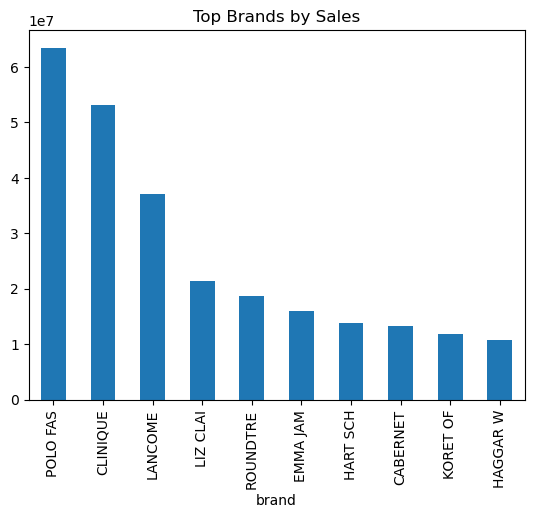

In [31]:
top_brands = clean_tx_transation_df.groupby('brand')['amt'].sum().sort_values(ascending=False).head(10)
top_brands.plot(kind='bar', title='Top Brands by Sales')

### Sales Distribution by Transaction Type

<Axes: title={'center': 'Sales Distribution by Transaction Type'}, xlabel='stype'>

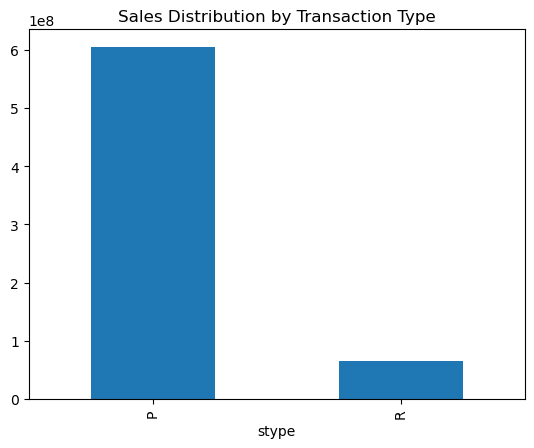

In [32]:
# Type of the transaction (Return or Purchase)
# P: purchase, R: return
clean_tx_transation_df.groupby('stype')['amt'].sum().plot(kind='bar', title='Sales Distribution by Transaction Type')

### Number of Items Sold per Brand

<Axes: title={'center': 'Number of Items Sold per Brand'}, xlabel='brand'>

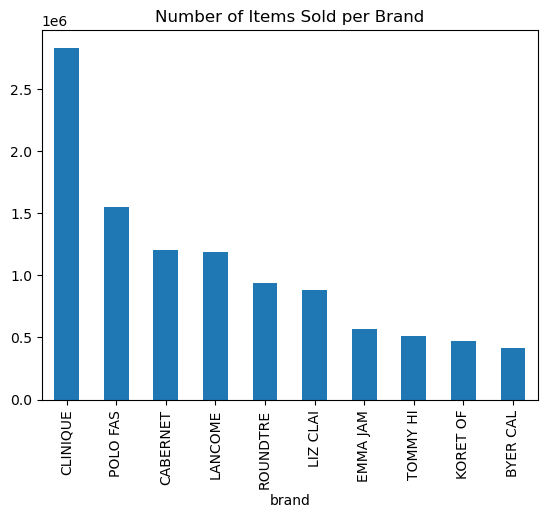

In [33]:
items_per_brand = clean_tx_transation_df.groupby('brand')['quantity'].sum().sort_values(ascending=False).head(10)
items_per_brand.plot(kind='bar', title='Number of Items Sold per Brand')

### Sales Over Time

/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_51421/3841723340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_tx_transation_df['saledate'] = pd.to_datetime(clean_tx_transation_df['saledate'])


<Axes: title={'center': 'Sales Over Time'}, xlabel='saledate'>

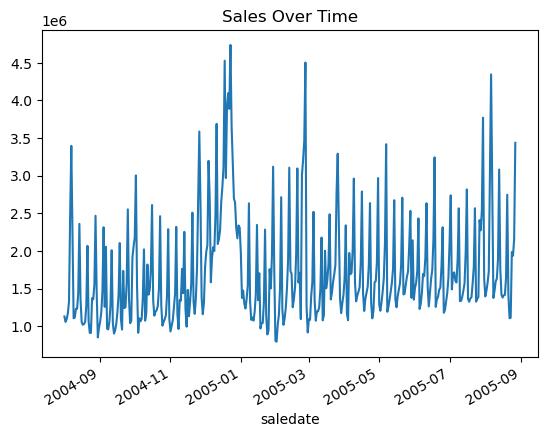

In [34]:
clean_tx_transation_df['saledate'] = pd.to_datetime(clean_tx_transation_df['saledate'])
sales_over_time = clean_tx_transation_df.groupby('saledate')['amt'].sum()
sales_over_time.plot(title='Sales Over Time')

In [35]:
sales_over_time.reset_index().sort_values('amt', ascending=False)

,saledate,amt
143,2004-12-23,4737332.63
138,2004-12-18,4528319.43
207,2005-02-26,4503995.87
367,2005-08-06,4346092.37
141,2004-12-21,4097551.05
...,...,...
43,2004-09-13,904696.86
174,2005-01-24,892899.15
29,2004-08-30,853285.09
181,2005-01-31,806936.86


In [36]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=sales_over_time.index.min().strftime('%Y-%m-%d'), 
                        end=sales_over_time.index.max().strftime('%Y-%m-%d')).to_pydatetime()
print("List of U.S. Federal Holidays:")
for holiday in holidays:
    print(holiday.strftime('%Y-%m-%d'))
    
print(sales_over_time.reset_index().sort_values('amt', ascending=False))

List of U.S. Federal Holidays:
2004-09-06
2004-10-11
2004-11-11
2004-11-25
2004-12-24
2004-12-31
2005-01-17
2005-02-21
2005-05-30
2005-07-04
      saledate         amt
143 2004-12-23  4737332.63
138 2004-12-18  4528319.43
207 2005-02-26  4503995.87
367 2005-08-06  4346092.37
141 2004-12-21  4097551.05
..         ...         ...
43  2004-09-13   904696.86
174 2005-01-24   892899.15
29  2004-08-30   853285.09
181 2005-01-31   806936.86
182 2005-02-01   796606.92

[389 rows x 2 columns]


In [37]:
clean_tx_transation_df['holiday'] = clean_tx_transation_df['saledate'].apply(lambda x: x in holidays)

/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_51421/548331687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_tx_transation_df['holiday'] = clean_tx_transation_df['saledate'].apply(lambda x: x in holidays)


### Observation
The time series plot illustrates the daily sales volume, revealing numerous peaks in sales occurring around holiday periods.

/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_51421/4249159716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_tx_transation_df['month'] = clean_tx_transation_df['saledate'].dt.month_name()


<Axes: title={'center': 'Sales by Month'}, xlabel='month'>

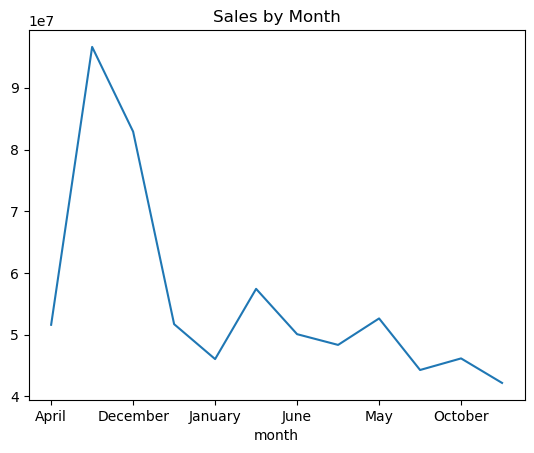

In [38]:
# Extract the month and year from SALEDATE and store in a new column 'MONTH'
clean_tx_transation_df['month'] = clean_tx_transation_df['saledate'].dt.month_name()

# Group by the 'MONTH' column and sum the sales amounts
sales_by_month = clean_tx_transation_df.groupby('month')['amt'].sum()

# If you want to plot this data:
sales_by_month.plot(title='Sales by Month')

/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_51421/878784388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_tx_transation_df['quarter'] = clean_tx_transation_df['saledate'].dt.to_period('Q').dt.quarter


<Axes: title={'center': 'Sales by Quarter'}, xlabel='quarter'>

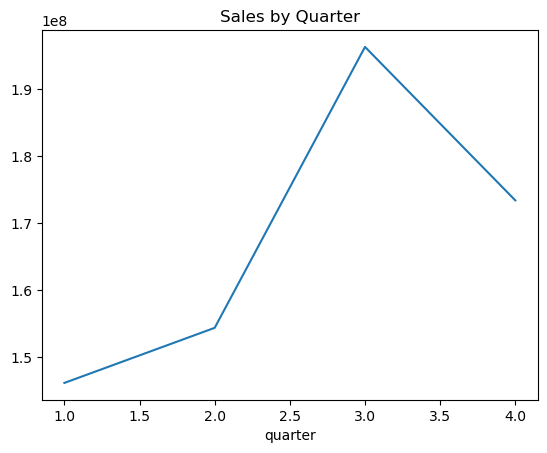

In [39]:
clean_tx_transation_df['quarter'] = clean_tx_transation_df['saledate'].dt.to_period('Q').dt.quarter
# Group by the 'MONTH' column and sum the sales amounts
sales_by_quarter = clean_tx_transation_df.groupby('quarter')['amt'].sum()

# If you want to plot this data:
sales_by_quarter.plot(title='Sales by Quarter')

/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_51421/2623737031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_tx_transation_df['weekday'] = clean_tx_transation_df['saledate'].dt.day_name()


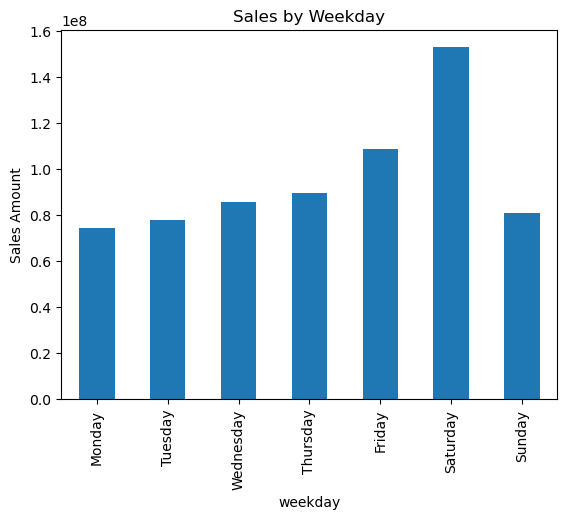

In [40]:
clean_tx_transation_df['weekday'] = clean_tx_transation_df['saledate'].dt.day_name()

# Group by the 'WEEKDAY' column and sum the sales amounts
sales_by_weekday = clean_tx_transation_df.groupby('weekday')['amt'].sum()

# Order the data by the days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_weekday = sales_by_weekday.reindex(ordered_days)

# Plotting the results
sales_by_weekday.plot(kind='bar', title='Sales by Weekday')
plt.ylabel('Sales Amount')
plt.show()

### Observation
Customers exhibit a preference for increased shopping activities each Saturday throughout the week. Additionally, stores in TX are operating well, with sales showing steady growth. 

### Distribution of Item Sizes

<Axes: title={'center': 'Distribution of Item Sizes'}, xlabel='size'>

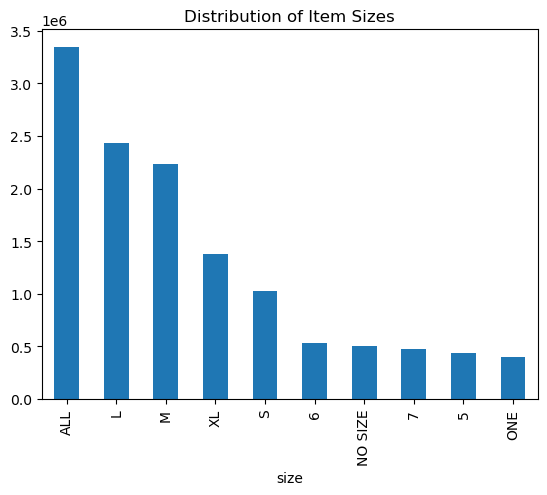

In [41]:
clean_tx_transation_df['size'].value_counts().head(10).plot(kind='bar', title='Distribution of Item Sizes')

### Top Selling Stores

<Axes: title={'center': 'Top Selling Stores'}, xlabel='store'>

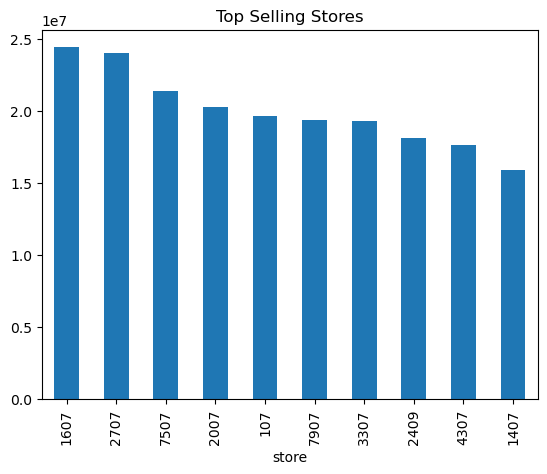

In [42]:
top_stores = clean_tx_transation_df.groupby('store')['amt'].sum().sort_values(ascending=False).head(10)
top_stores.plot(kind='bar', title='Top Selling Stores')

### Most Common Colors Sold

<Axes: title={'center': 'Top 10 Most Common Colors Sold'}, xlabel='color'>

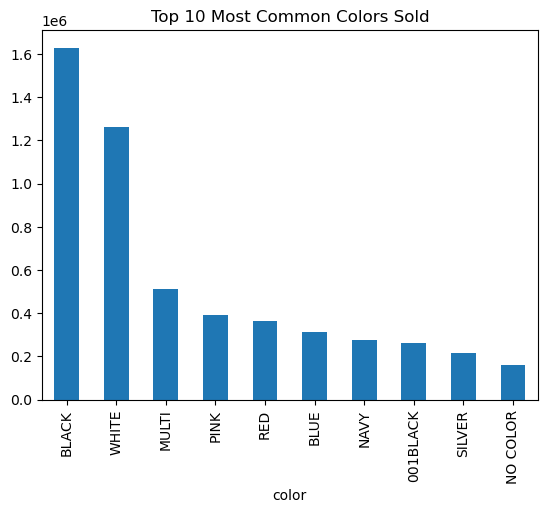

In [43]:
clean_tx_transation_df['color'].value_counts().head(10).plot(kind='bar', title='Top 10 Most Common Colors Sold')


### Distribution of top vendors in Transactions

<Axes: title={'center': 'Distribution of Item Quantities in Transactions'}, xlabel='vendor'>

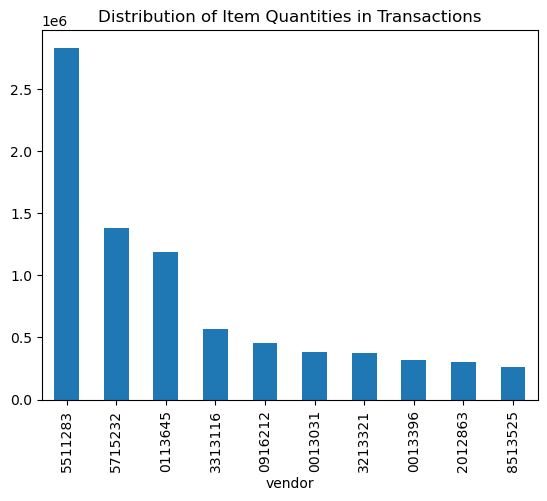

In [44]:
clean_tx_transation_df['vendor'].value_counts().head(10).plot(kind='bar', title='Distribution of Item Quantities in Transactions')


### Sales vs Discount Percentage

In [45]:
tx_sku_stype_df = clean_tx_transation_df.groupby(['sku', 'stype'])["stype"].aggregate(['count']).reset_index()
tx_sku_stype_sum = tx_sku_stype_df.pivot(index = 'sku', columns = 'stype', values = 'count').reset_index().fillna(0)
tx_sku_stype_sum["purchase_pct"] = tx_sku_stype_sum.apply(lambda x: 100 * x['P'] / (x['P'] + x['R']), axis = 1)
tx_sku_stype_sum["return_pct"] = tx_sku_stype_sum.apply(lambda x: 100 * x['R'] / (x['P'] + x['R']), axis = 1)
tx_sku_stype_sum.head(10)

stype,sku,P,R,purchase_pct,return_pct
0,3,3.0,1.0,75.000000,25.000000
1,23,1.0,0.0,100.000000,0.000000
2,24,4.0,0.0,100.000000,0.000000
3,55,6.0,0.0,100.000000,0.000000
4,107,1.0,0.0,100.000000,0.000000
5,131,4.0,0.0,100.000000,0.000000
6,156,34.0,11.0,75.555556,24.444444
7,164,17.0,1.0,94.444444,5.555556
8,180,11.0,0.0,100.000000,0.000000
9,190,8.0,2.0,80.000000,20.000000


In [46]:
clean_tx_transation_df['discount_percentage'] = 100 * clean_tx_transation_df['amt'] / clean_tx_transation_df['orgprice'] * clean_tx_transation_df['quantity']
clean_tx_transation_df['profit'] = (clean_tx_transation_df['amt'] - clean_tx_transation_df['cost']) * clean_tx_transation_df['quantity']

/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_51421/3510714510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_tx_transation_df['discount_percentage'] = 100 * clean_tx_transation_df['amt'] / clean_tx_transation_df['orgprice'] * clean_tx_transation_df['quantity']
/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_51421/3510714510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_tx_transation_df['profit'] = (clean_tx_transation_df['amt'] - clean_tx_transation_df['cost']

In [47]:
avg_discount_rate_each_sku = clean_tx_transation_df.groupby(['sku'])['discount_percentage'].mean().reset_index()

In [48]:
avg_discount_rate_each_sku.sort_values('discount_percentage', ascending=False)

,sku,discount_percentage
416716,9829884,100.000000
23134,554745,100.000000
395723,9329839,100.000000
394495,9299839,100.000000
131194,3090025,100.000000
...,...,...
341167,8032336,0.875000
102642,2430247,0.775424
340673,8020010,0.589286
252491,5930003,0.303030


In [49]:
# Custom function to calculate Q1
import numpy as np
def calculate_q1(column):
    return np.percentile(column, 25)

# Custom function to calculate Q3
def calculate_q3(column):
    return np.percentile(column, 75)

discount_percentage_range_sum = clean_tx_transation_df.groupby(['sku']).agg(max_discount_percentage = ("discount_percentage", "max"),
                                                                            median_discount_percentage = ("discount_percentage", "median"), 
                                                                            min_discount_percentage = ("discount_percentage", "min"), 
                                                                            q1_discount_percentage = ("discount_percentage", calculate_q1),
                                                                            q3_discount_percentage = ("discount_percentage", calculate_q3),
                                                                            count_gb_sku = ("sku", "size")).reset_index() 
discount_percentage_range_sum['discount_percentage_range'] = discount_percentage_range_sum['max_discount_percentage'] - discount_percentage_range_sum['min_discount_percentage']
discount_percentage_range_sum['discount_iqr'] = discount_percentage_range_sum['q3_discount_percentage'] - discount_percentage_range_sum['q1_discount_percentage']

discount_percentage_range_sum.sort_values('discount_percentage_range', ascending=False)

,sku,max_discount_percentage,median_discount_percentage,min_discount_percentage,q1_discount_percentage,q3_discount_percentage,count_gb_sku,discount_percentage_range,discount_iqr
49222,1169816,100.000000,25.000000,0.001681,25.000000,35.000000,13,99.998319,10.000000
254276,5973491,100.000000,75.140000,0.002857,50.000000,100.000000,311,99.997143,50.000000
330669,7793923,100.000000,100.000000,0.005587,55.860335,100.000000,121,99.994413,44.139665
29487,706556,100.000000,67.000000,0.007752,56.500000,100.000000,20,99.992248,43.500000
411502,9707486,100.000000,53.561224,0.010204,25.000000,71.418367,640,99.989796,46.418367
...,...,...,...,...,...,...,...,...,...
350663,8263447,3.773585,3.773585,3.773585,3.773585,3.773585,1,0.000000,0.000000
208492,4898009,100.000000,100.000000,100.000000,100.000000,100.000000,2,0.000000,0.000000
208502,4898182,25.000000,25.000000,25.000000,25.000000,25.000000,1,0.000000,0.000000
208512,4898309,25.000000,25.000000,25.000000,25.000000,25.000000,1,0.000000,0.000000


In [50]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# Use pd.cut to bin the data
bins_data = pd.cut(discount_percentage_range_sum['discount_percentage_range'], bins)
# Count the occurrences in each discount bin
bin_counts = pd.value_counts(bins_data)
bin_counts

discount_percentage_range
(80, 90]     70644
(70, 80]     60549
(60, 70]     43752
(40, 50]     35387
(20, 30]     23780
(30, 40]     22228
(50, 60]     21042
(10, 20]     20770
(90, 100]    10315
(0, 10]       7528
Name: count, dtype: int64

In [51]:
clean_tx_transation_temp = pd.merge(clean_tx_transation_df, discount_percentage_range_sum, on='sku', how='left')

In [52]:
# We want rows with complete transaction information
clean_tx_transation_temp = clean_tx_transation_temp[~clean_tx_transation_temp['profit'].isna()]

In [53]:
clean_tx_transation_temp.head()

,sku,store,saledate,stype,quantity,orgprice,amt,dept,upc,style,...,discount_percentage,profit,max_discount_percentage,median_discount_percentage,min_discount_percentage,q1_discount_percentage,q3_discount_percentage,count_gb_sku,discount_percentage_range,discount_iqr
0,5148332,1007,2005-07-07,P,1,50.0,33.5,9801.0,000400008332514,5 LX1J90,...,67.0,19.1,100.0,75.0,35.0,67.0,100.0,298,65.0,33.0
1,5148332,1007,2005-05-24,P,1,50.0,50.0,9801.0,000400008332514,5 LX1J90,...,100.0,35.6,100.0,75.0,35.0,67.0,100.0,298,65.0,33.0
2,5148332,1007,2005-04-09,P,1,50.0,50.0,9801.0,000400008332514,5 LX1J90,...,100.0,35.6,100.0,75.0,35.0,67.0,100.0,298,65.0,33.0
3,5148332,1007,2005-05-29,P,1,50.0,50.0,9801.0,000400008332514,5 LX1J90,...,100.0,35.6,100.0,75.0,35.0,67.0,100.0,298,65.0,33.0
4,5148332,1007,2005-06-12,R,1,50.0,50.0,9801.0,000400008332514,5 LX1J90,...,100.0,35.6,100.0,75.0,35.0,67.0,100.0,298,65.0,33.0


In [54]:
clean_tx_transation_temp['lower_bound'] = clean_tx_transation_temp['q1_discount_percentage'] \
                                            - clean_tx_transation_temp['discount_iqr'] * 5 

In [55]:
clean_tx_transation_subset = clean_tx_transation_temp[~((clean_tx_transation_temp['discount_percentage'] < 3)
                              & (clean_tx_transation_temp['discount_percentage'] < clean_tx_transation_temp['lower_bound']) \
                              & (clean_tx_transation_temp['discount_percentage_range'] > 70))]

### Observation
We decide to exclude transactions with excessively high discounts, such as selling items at prices less than 3% of the original price. This is necessary because we cannot ascertain whether these transactions are a result of inventory clearance or pricing errors.

Text(0.5, 1.0, 'Histogram of Percentage')

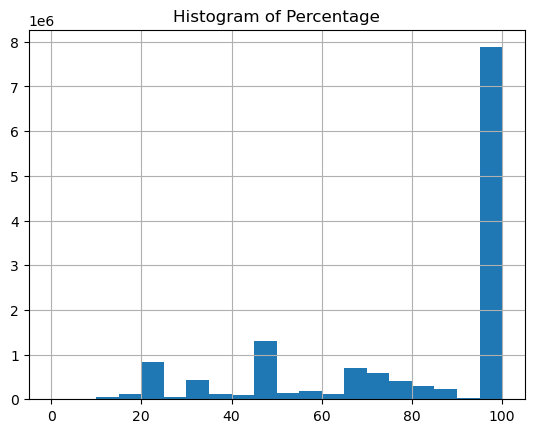

In [56]:
clean_tx_transation_subset['discount_percentage'].hist(bins = 20)
plt.title('Histogram of Percentage')

### Observation
We have observed many instances of transactions with exceptionally high discount rates during inventory clearance. Consequently, we are exploring the possibility of predicting the profit margin before stocking these items.

In [57]:
clean_tx_transation_subset.columns

Index(['sku', 'store', 'saledate', 'stype', 'quantity', 'orgprice', 'amt',
       'dept', 'upc', 'style', 'color', 'size', 'packsize', 'vendor', 'brand',
       'cost', 'retail', 'deptdesc', 'holiday', 'month', 'quarter', 'weekday',
       'discount_percentage', 'profit', 'max_discount_percentage',
       'median_discount_percentage', 'min_discount_percentage',
       'q1_discount_percentage', 'q3_discount_percentage', 'count_gb_sku',
       'discount_percentage_range', 'discount_iqr', 'lower_bound'],
      dtype='object')

In [58]:
columns_to_drop = ['discount_percentage', 'profit',
       'max_discount_percentage', 'median_discount_percentage',
       'min_discount_percentage', 'q1_discount_percentage',
       'q3_discount_percentage', 'count_gb_sku', 'discount_percentage_range',
       'discount_iqr', 'lower_bound', 'upc', 'vendor', 'color', 'style', 'size', 'dept']
clean_tx_transation_final = clean_tx_transation_subset.drop(columns=columns_to_drop,  errors='ignore')

In [59]:
clean_tx_transation_final.head()

,sku,store,saledate,stype,quantity,orgprice,amt,packsize,brand,cost,retail,deptdesc,holiday,month,quarter,weekday
0,5148332,1007,2005-07-07,P,1,50.0,33.5,1.0,LIZ CLAI,14.4,12.5,CATALIN,False,July,3,Thursday
1,5148332,1007,2005-05-24,P,1,50.0,50.0,1.0,LIZ CLAI,14.4,12.5,CATALIN,False,May,2,Tuesday
2,5148332,1007,2005-04-09,P,1,50.0,50.0,1.0,LIZ CLAI,14.4,12.5,CATALIN,False,April,2,Saturday
3,5148332,1007,2005-05-29,P,1,50.0,50.0,1.0,LIZ CLAI,14.4,12.5,CATALIN,False,May,2,Sunday
4,5148332,1007,2005-06-12,R,1,50.0,50.0,1.0,LIZ CLAI,14.4,12.5,CATALIN,False,June,2,Sunday


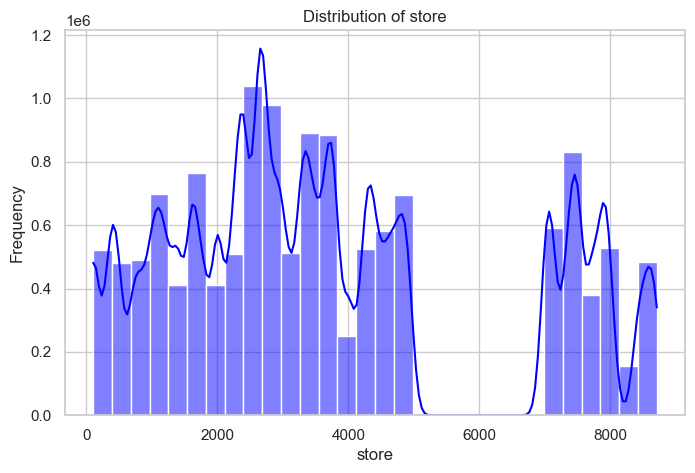

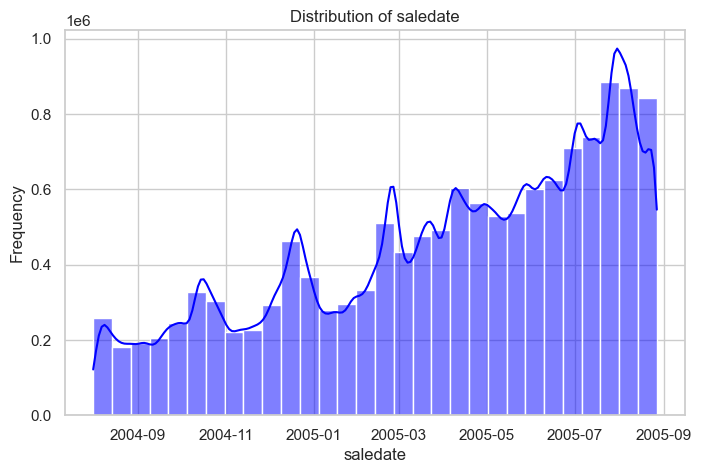

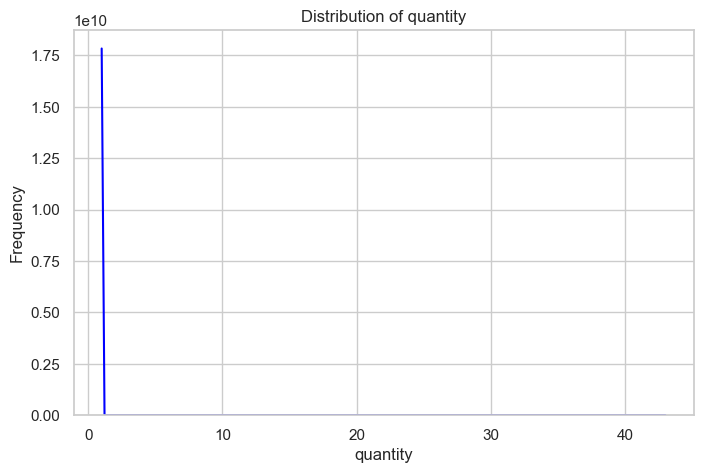

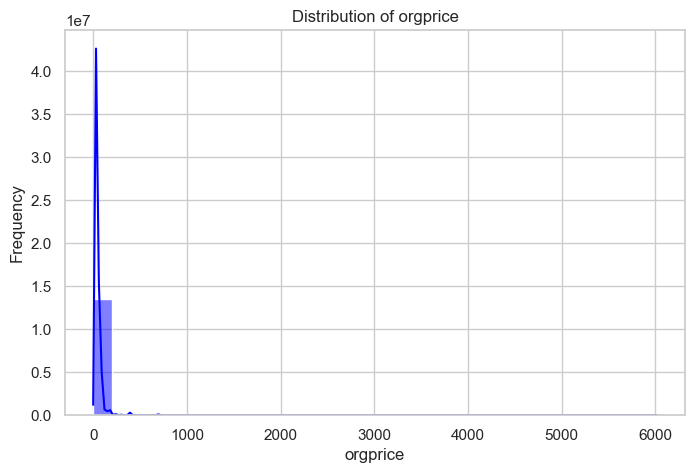

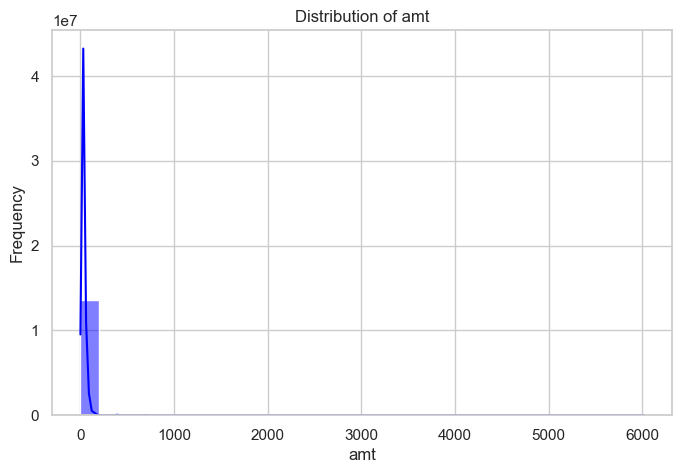

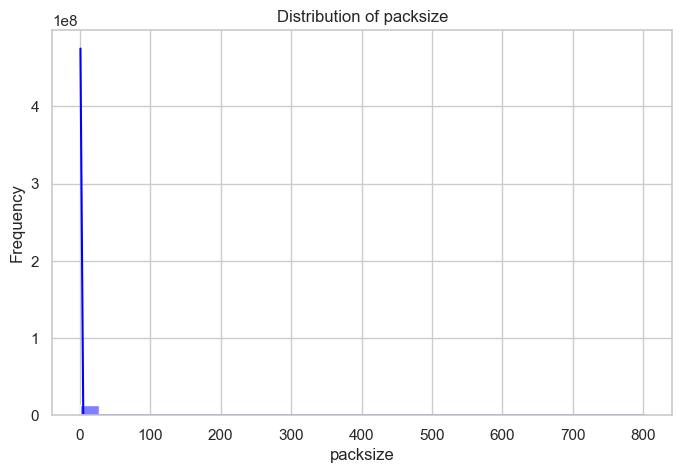

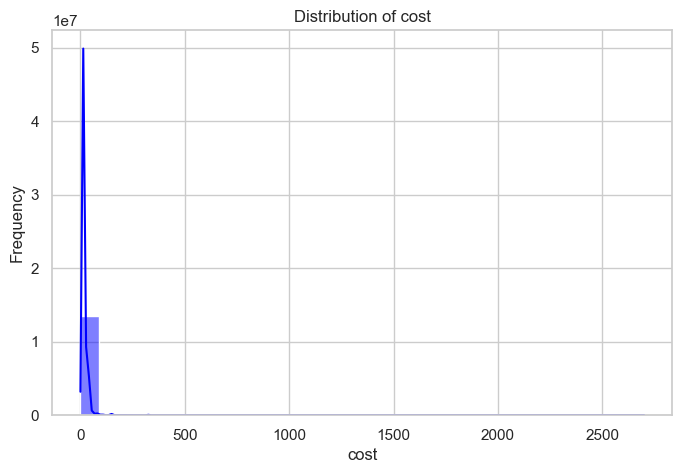

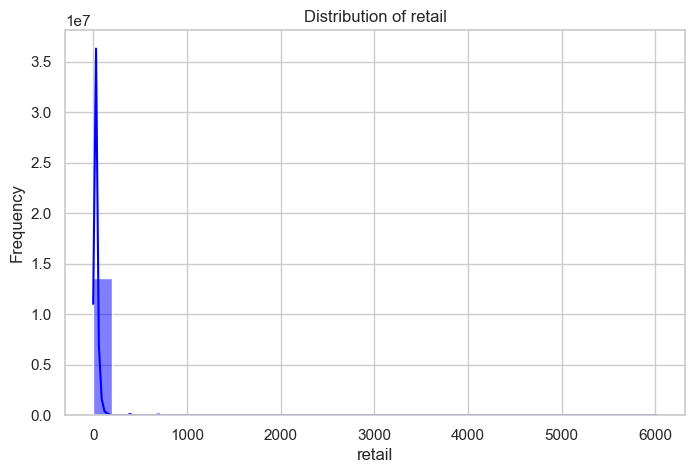

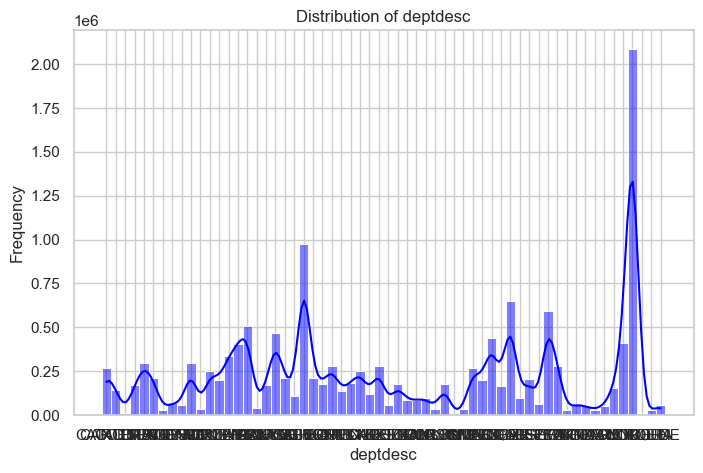

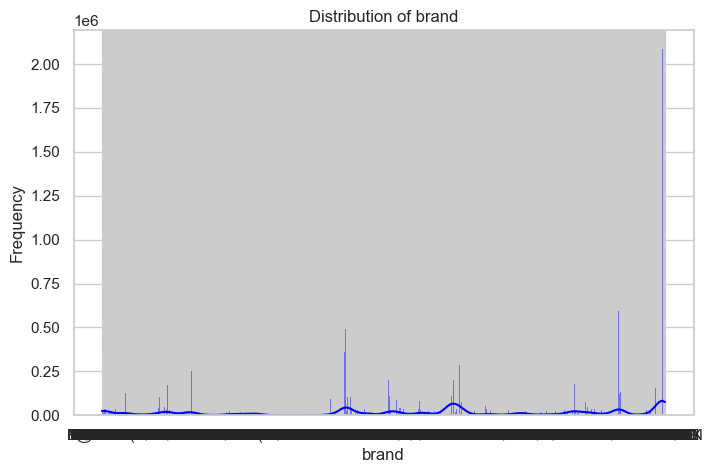

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


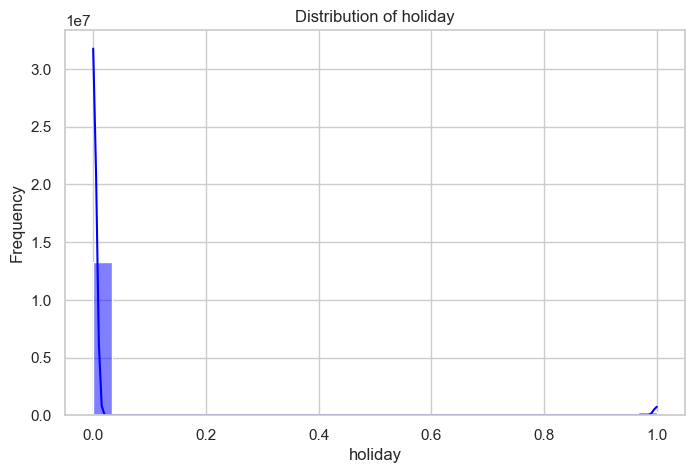

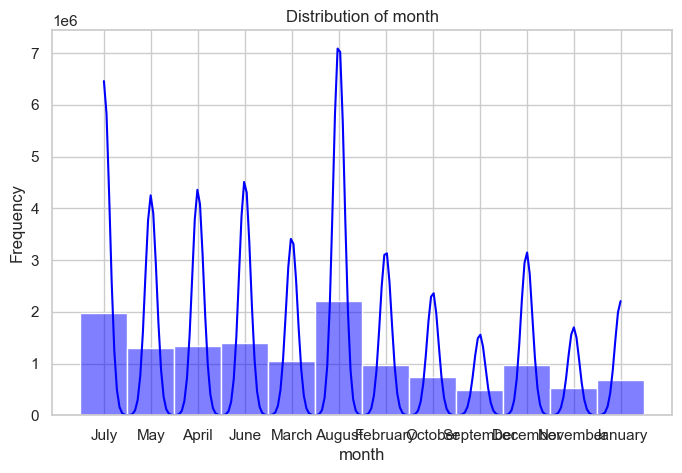

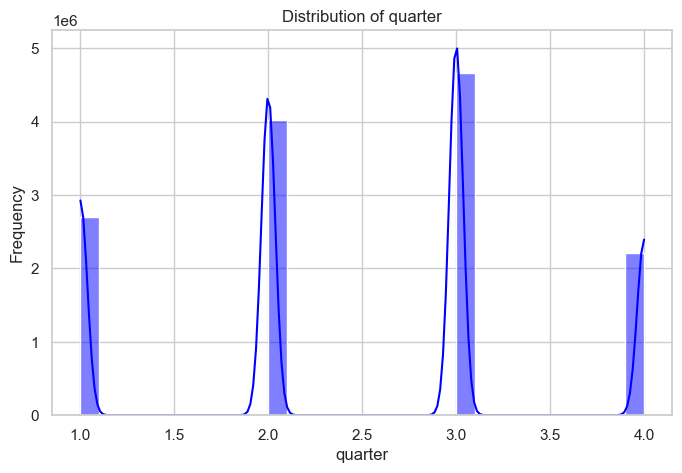

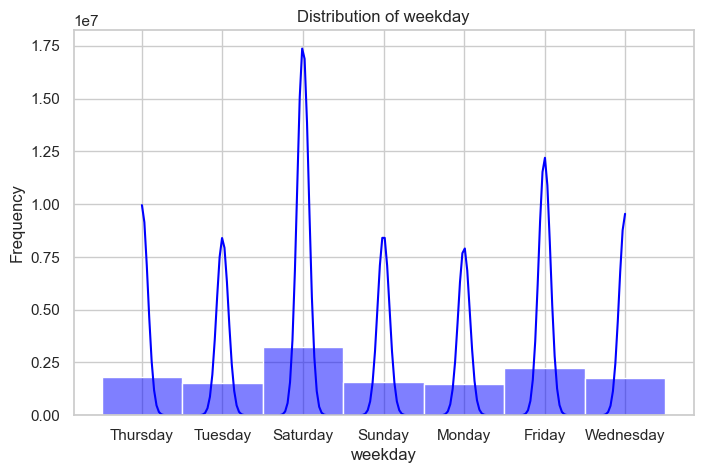

In [60]:
# Assuming 'df' is your DataFrame
# Load your DataFrame or replace 'df' with your DataFrame variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Iterate through each column in the DataFrame and plot the distribution
for column in ['store', 'saledate', 'quantity', 'orgprice', 'amt', 'packsize',
       'cost', 'retail', 'deptdesc', 'brand', 'holiday', 'month', 'quarter', 'weekday']:
    plt.figure(figsize=(8, 5))
    sns.histplot(clean_tx_transation_final[column], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [61]:
clean_tx_transation_final.to_pickle(f'clean_tx_transation.pkl')
# pd.read_pickle(f"clean_tx_transation.pkl")

In [62]:
# Exclude rows containing null values for the 'brands' column
clean_tx_transation_final

,sku,store,saledate,stype,quantity,orgprice,amt,packsize,brand,cost,retail,deptdesc,holiday,month,quarter,weekday
0,5148332,1007,2005-07-07,P,1,50.0,33.5,1.0,LIZ CLAI,14.4,12.5,CATALIN,False,July,3,Thursday
1,5148332,1007,2005-05-24,P,1,50.0,50.0,1.0,LIZ CLAI,14.4,12.5,CATALIN,False,May,2,Tuesday
2,5148332,1007,2005-04-09,P,1,50.0,50.0,1.0,LIZ CLAI,14.4,12.5,CATALIN,False,April,2,Saturday
3,5148332,1007,2005-05-29,P,1,50.0,50.0,1.0,LIZ CLAI,14.4,12.5,CATALIN,False,May,2,Sunday
4,5148332,1007,2005-06-12,R,1,50.0,50.0,1.0,LIZ CLAI,14.4,12.5,CATALIN,False,June,2,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26482636,5093166,7707,2004-11-27,P,1,57.5,57.5,6.0,DESIGNER,34.5,57.5,BLUE,False,November,4,Saturday
26482637,5093166,7707,2004-12-21,P,1,57.5,57.5,6.0,DESIGNER,34.5,57.5,BLUE,False,December,4,Tuesday
26482638,5093166,7707,2004-12-23,P,1,57.5,57.5,6.0,DESIGNER,34.5,57.5,BLUE,False,December,4,Thursday
26482639,5093166,7707,2004-12-23,P,1,57.5,57.5,6.0,DESIGNER,34.5,57.5,BLUE,False,December,4,Thursday


## Data Cleaning

In [63]:
clean_tx_transation_final.groupby('stype').size()

stype
P    12600008
R     1008184
dtype: int64

In [64]:
# Only focus on successful transactions
clean_tx_transation_final = clean_tx_transation_final[clean_tx_transation_final['stype'] == 'P']
clean_tx_transation_final = clean_tx_transation_final.drop(columns=['stype', 'retail'])

In [65]:
clean_tx_transation_final.isna().sum()

sku             0
store           0
saledate        0
quantity        0
orgprice        0
amt             0
packsize        0
brand       13917
cost            0
deptdesc        0
holiday         0
month           0
quarter         0
weekday         0
dtype: int64

In [66]:
# Exclude rows containing null values for the 'deptdesc' column

clean_tx_transation_final[clean_tx_transation_final['cost'] == 0]



,sku,store,saledate,quantity,orgprice,amt,packsize,brand,cost,deptdesc,holiday,month,quarter,weekday


In [67]:
# Exclude rows where a single transaction is associated with a specific (sku, store) combination.
clean_tx_transation_final = clean_tx_transation_final.groupby(['sku', 'store']).filter(lambda group: len(group) > 1)

In [68]:
# Remove outliers
columns_to_check = ['quantity', 'orgprice', 'packsize', 'cost']
quantile_threshold = 0.99
quantiles = clean_tx_transation_final[columns_to_check].quantile(quantile_threshold)
filter_condition = clean_tx_transation_final[columns_to_check] <= quantiles

clean_tx_transation_final = clean_tx_transation_final[filter_condition.all(axis=1)]
len(clean_tx_transation_final)

11151734

In [69]:
# Exclude rows where a single transaction is associated with a specific (sku, store) combination.
clean_tx_transation_final = clean_tx_transation_final.groupby(['sku', 'store']).filter(lambda group: len(group) > 1)

## Lagged Features

In [70]:
import dask.dataframe as dd
dask_df = dd.from_pandas(clean_tx_transation_final, npartitions=10)  # Adjust the number of partitions as needed
clean_tx_transation_final = dask_df.groupby(['sku', 'store']).apply(lambda group: group.sort_values('saledate')).compute().reset_index(drop=True)
clean_tx_transation_final.to_pickle(f'sorted_clean_tx_transation.pkl')

/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_51421/3501694491.py:3: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  clean_tx_transation_final = dask_df.groupby(['sku', 'store']).apply(lambda group: group.sort_values('saledate')).compute().reset_index(drop=True)


In [71]:
clean_tx_transation_final['lagged_amt'] = clean_tx_transation_final.groupby(['sku', 'store'])['amt'].shift()

In [72]:
clean_tx_transation_final['lagged_amt'].fillna(clean_tx_transation_final['orgprice'], inplace=True)

In [73]:
clean_tx_transation_final['lagged_orgprice'] = clean_tx_transation_final.groupby(['sku', 'store'])['orgprice'].shift()

In [74]:
clean_tx_transation_final['lagged_orgprice'].fillna(clean_tx_transation_final['orgprice'], inplace=True)

In [75]:
clean_tx_transation_final.head()

,sku,store,saledate,quantity,orgprice,amt,packsize,brand,cost,deptdesc,holiday,month,quarter,weekday,lagged_amt,lagged_orgprice
0,262,1007,2005-08-07,1,4.0,2.0,1.0,JOLIE IN,0.95,CARTERS,False,August,3,Sunday,4.0,4.0
1,262,1007,2005-08-12,1,4.0,2.0,1.0,JOLIE IN,0.95,CARTERS,False,August,3,Friday,2.0,4.0
2,262,1807,2005-06-03,1,4.0,4.0,1.0,JOLIE IN,0.95,CARTERS,False,June,2,Friday,4.0,4.0
3,262,1807,2005-08-13,1,4.0,2.0,1.0,JOLIE IN,0.95,CARTERS,False,August,3,Saturday,4.0,4.0
4,262,2607,2005-08-08,1,4.0,2.0,1.0,JOLIE IN,0.95,CARTERS,False,August,3,Monday,4.0,4.0


In [76]:
columns_to_change = ['store', 'quarter']
clean_tx_transation_final[columns_to_change] = clean_tx_transation_final[columns_to_change].astype('object')
clean_tx_transation_final.dtypes

sku                         int64
store                      object
saledate           datetime64[ns]
quantity                    int64
orgprice                  float64
amt                       float64
packsize                  float64
brand                      object
cost                      float64
deptdesc                   object
holiday                      bool
month                      object
quarter                    object
weekday                    object
lagged_amt                float64
lagged_orgprice           float64
dtype: object

In [77]:
clean_tx_transation_final.to_pickle(f'sorted_clean_tx_transation.pkl')